In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import classD_1dMFGTN  # make sure this points to the lowercase file

importlib.reload(classD_1dMFGTN)
from classD_1dMFGTN import classD_1d_MFGTN

In [3]:

N_list = 32
mu_list = np.linspace(0, 4, 21)

model = classD_1d_MFGTN(N=N, mu_1 = 3, DW=False, nshell=None)


NameError: name 'N' is not defined

In [ ]:

# 2) Run a single-sample adaptive circuit with postselection
result = model.run_adaptive_circuit(
    cycles=20,              # adjust as needed
    G_history=True,
    progress=True,
    postselect=False,
    samples=1,
    parallelize_samples=False,
    store="top",           # keep full covariance per cycle
    init_mode="random_pure",
)

G_hist = result["G_hist"][0]   # shape (T, 2N, 2N)
T = G_hist.shape[0]
print(G_hist.shape)


Running adaptive circuit (sites)::   0%|          | 0/640 [00:00<?, ?site/s]

Total elapsed: 8.24 s
(21, 64, 64)


In [ ]:

# 3) Exact Kitaev ground-state covariance
G_exact = model.kitaev_GS_covariance(N=N, mu=model.mu_1, DW=False, PBCs=True)

# 4) Frobenius norms vs time
fro_diffs = [np.linalg.norm(G_hist[t] - G_exact, ord="fro") for t in range(T)]


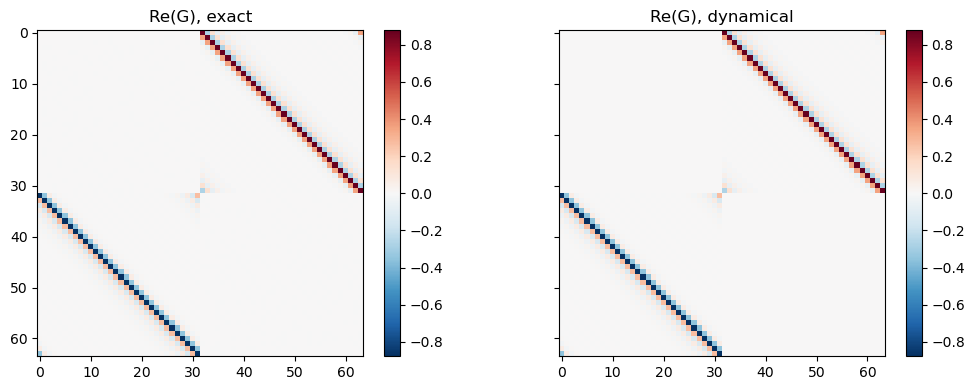

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
im = axs[0].imshow(np.real(G_exact), cmap="RdBu_r")
axs[0].set_title(rf"Re(G), exact")
fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
im = axs[1].imshow(np.real(G_hist[-1]), cmap="RdBu_r")
axs[1].set_title(rf"Re(G), dynamical")
fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)

fig.tight_layout()
plt.show()


In [4]:

# 5) Plot
plt.figure(figsize=(6, 4))
plt.plot(np.arange(T), fro_diffs, marker="o", lw=1.2)
plt.xlabel("Time step (cycle index)")
plt.ylabel(r"$\|G_{\mathrm{top}} - G_{\mathrm{exact}}\|_F$")
plt.title("Adaptive covariance vs. Kitaev ground state (top layer)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.yscale("log")
plt.show()

NameError: name 'T' is not defined

<Figure size 600x400 with 0 Axes>

In [5]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
data = np.load("results/mi_scan_finer_near_mu=2.npz", allow_pickle=True)


In [6]:
mu_list = data["mu_list"]
N_list = data["N_list"].tolist()
nshell_list = data["nshell_list"].tolist()
print(nshell_list)
mi_mean = data["mi_mean"].item()  # dict
mi_std = data["mi_std"].item()    # dict


[1, 2, 3, None]


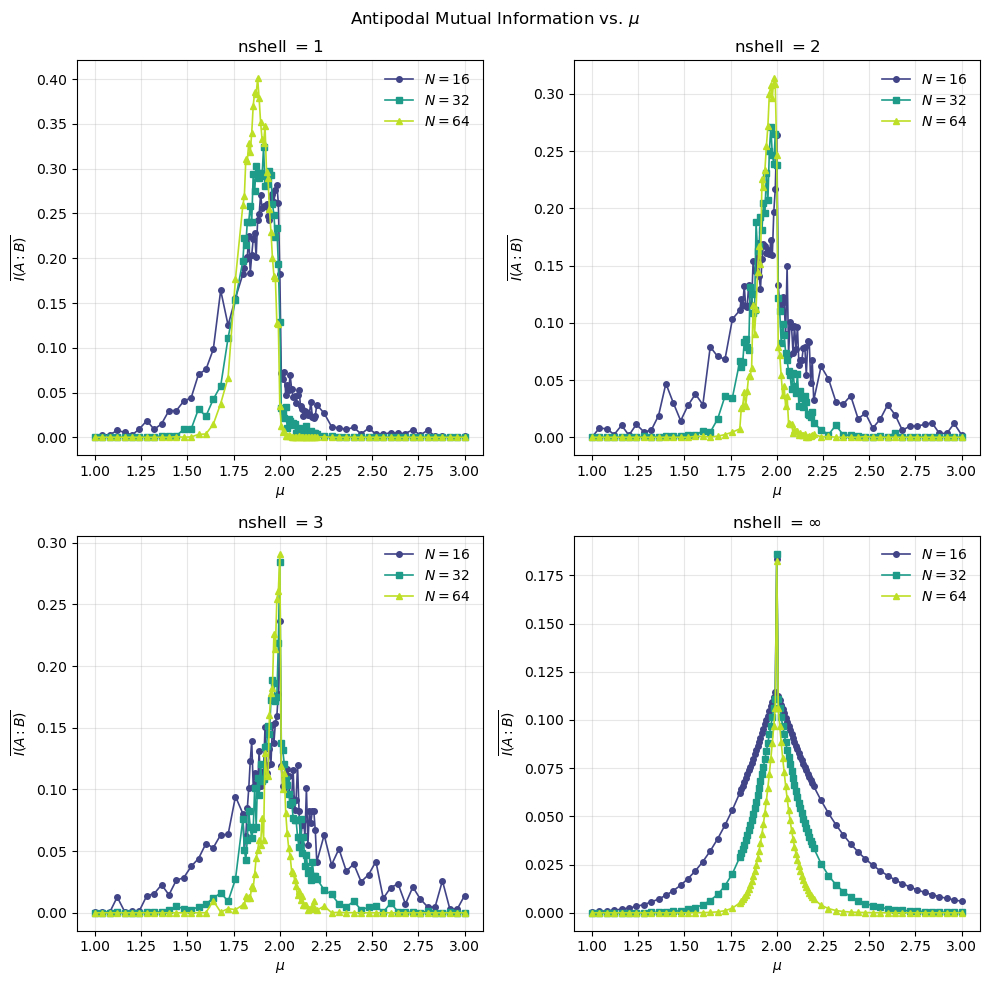

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
colors = cm.viridis(np.linspace(0.2, 0.9, len(N_list)))
markers = ["o", "s", "^", "D", "P"]
ax_coord = [(0, 0), (0, 1), (1, 0), (1, 1)]

for index, nshell in enumerate(nshell_list):
    nshell_label = r"\infty" if nshell is None else nshell
    idx = ax_coord[index]
    for ci, N in enumerate(N_list):
        key = (N, nshell)
        ax[idx].plot(
            mu_list,
            np.array(mi_mean[key]),
            marker=markers[ci % len(markers)],
            color=colors[ci],
            label=rf"$N={N}$",
            linewidth=1.2,
            markersize=4,
        )
    ax[idx].set_xlabel(r"$\mu$")
    ax[idx].set_ylabel(r"$\overline{I(A:B)}$")
    ax[idx].set_title(rf"nshell $= {nshell_label}$")
    ax[idx].grid(True, alpha=0.3)
    ax[idx].legend(frameon=False, ncol=1, fontsize=10)
fig.suptitle((r"Antipodal Mutual Information vs. $\mu$"))
fig.tight_layout()
plt.show()


mu_list: [1.5        1.53333333 1.56666667 1.6        1.63333333 1.66666667
 1.7        1.73333333 1.76666667 1.8        1.83333333 1.86666667
 1.9        1.93333333 1.96666667 2.         2.03333333 2.06666667
 2.1        2.13333333 2.16666667 2.2        2.23333333 2.26666667
 2.3        2.33333333 2.36666667 2.4        2.43333333 2.46666667
 2.5       ]
N_list: [ 16  32  64 128 256]
cycles_per_N: {16: 16, 32: 32, 64: 64, 128: 128, 256: 256}
samples: 10


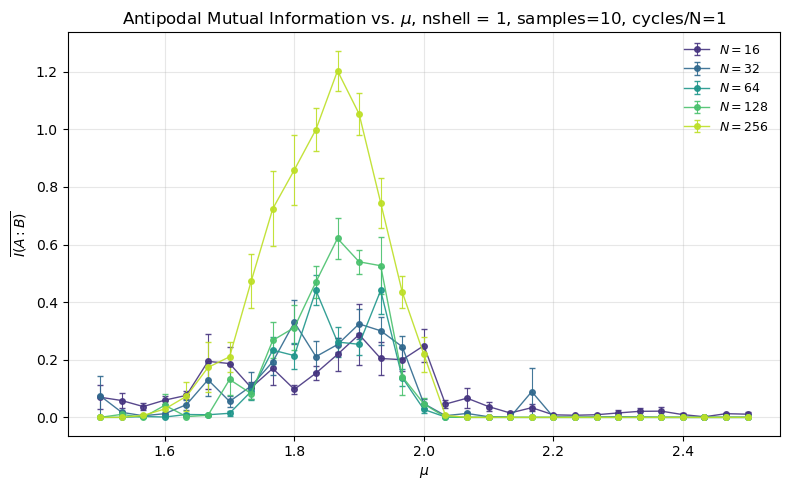

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Load saved data (dict-like entries need allow_pickle=True)
data = np.load('results/mi_scan_vs_mu_vs_N_nshell=1.npz', allow_pickle=True)

mu_list = data["mu_list"]
print("mu_list:", mu_list)
N_list = data["N_list"]
print("N_list:", N_list)
mi_mean = data["mi_mean"].item()
mi_std = data["mi_std"].item()
cycles_per_N = data["cycles_per_N"].item()
print("cycles_per_N:", cycles_per_N)
samples = int(data["samples"])
print("samples:", samples)

fig, ax = plt.subplots(figsize=(8, 5))
colors = cm.viridis(np.linspace(0.15, 0.9, len(N_list)))
marker = "o"

for ci, N in enumerate(N_list):
    mean_arr = np.array(mi_mean[N])
    std_arr = np.array(mi_std[N])
    ax.errorbar(
        mu_list,
        mean_arr,
        yerr=std_arr / np.sqrt(samples),
        marker=marker,
        color=colors[ci],
        label=rf"$N={int(N)}$",
        linewidth=1.0,
        markersize=4,
        elinewidth=0.8,
        capsize=2.5,
        alpha=0.9,
    )

ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\overline{I(A:B)}$")
ax.set_title(rf"Antipodal Mutual Information vs. $\mu$, nshell = 1, samples={samples}, cycles/N=1")
ax.grid(True, alpha=0.3)
ax.legend(frameon=False, ncol=1, fontsize=9)
fig.tight_layout()
plt.show()


In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import importlib
import classD_1dMFGTN  # ensure lowercase filename
importlib.reload(classD_1dMFGTN)
from classD_1dMFGTN import classD_1d_MFGTN

base_dir = "cache/G_history_samples"
N_list = [16, 32, 64, ]
samples = 10  # expected per saved file
cmap = cm.plasma

def extract_mu_from_filename(path):
    # filenames look like ..._mu1=1.5_t1=1.0.npz
    fname = os.path.basename(path)
    for part in fname.split("_"):
        if part.startswith("mu1="):
            return float(part.split("=")[1])
    raise ValueError(f"mu1 not found in {fname}")

# Collect files by N
files_by_N = {N: [] for N in N_list}
for N in N_list:
    pattern = os.path.join(base_dir, f"N{N}_C{N}_S{samples}_nsh=1_DW0_init-random_pure_store-top_mu1=*.npz")
    files = glob.glob(pattern)
    files_by_N[N] = sorted(files, key=extract_mu_from_filename)


------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------


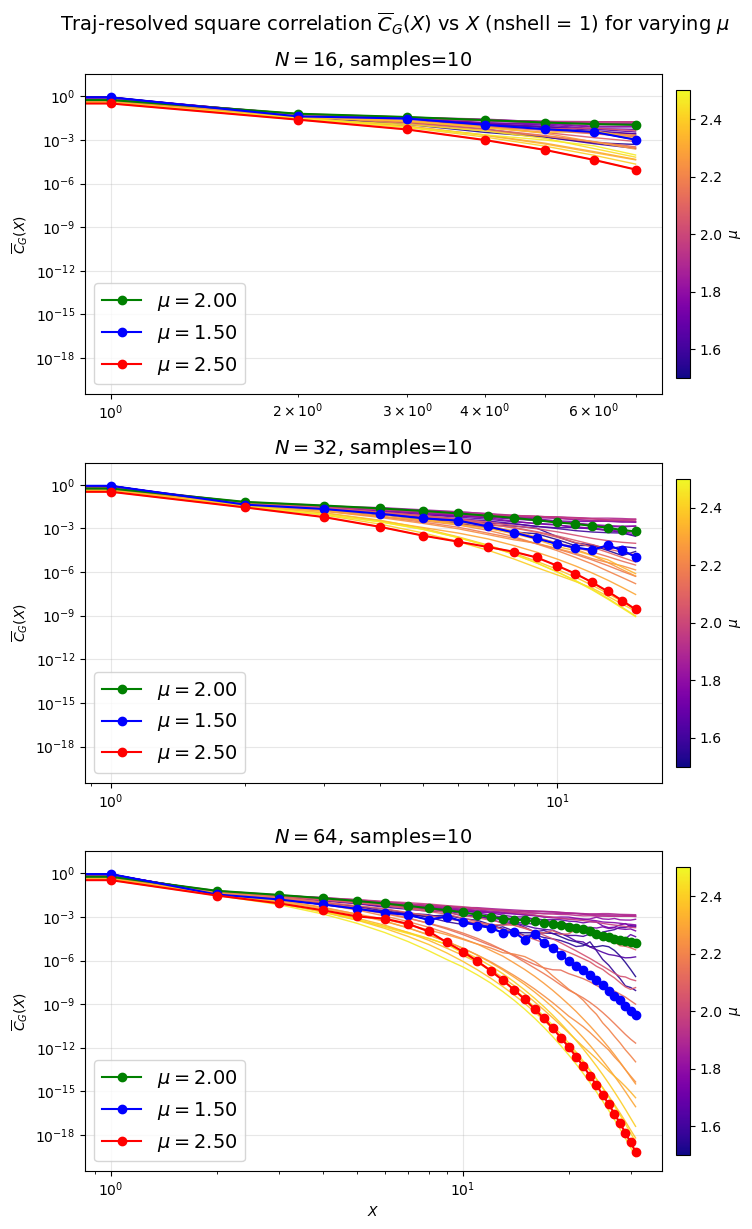

In [7]:

# Precompute colors mapped to mu range
all_mu = sorted({extract_mu_from_filename(f) for flist in files_by_N.values() for f in flist})
mu_min, mu_max = min(all_mu), max(all_mu)
norm = colors.Normalize(vmin=mu_min, vmax=mu_max)
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)

# Compute C(X)
corr_mean = {N: [] for N in N_list}
for N in N_list:
    model = classD_1d_MFGTN(N=N, DW=False, nshell=1, envelope_width=None, mu_1=0.0, mu_2=0.0)
    for path in files_by_N[N]:
        data = np.load(path, allow_pickle=True)
        if "steady_state" not in data:
            raise KeyError(f"'steady_state' missing in {path}")
        Gs = data["steady_state"]  # shape (samples, 2N, 2N)
        C_stack = np.stack([model.square_correlation_function(G) for G in Gs], axis=0)
        corr_mean[N].append(C_stack.mean(axis=0))

# Plotting with colorbar for mu
fig, axes = plt.subplots(len(N_list), 1, figsize=(8, 4 * len(N_list)), sharey=True)
axes = np.atleast_1d(axes)

for ai, N in enumerate(N_list):
    ax = axes[ai]
    for path, C_mean in zip(files_by_N[N], corr_mean[N]):
        mu_val = extract_mu_from_filename(path)
        color = scalar_map.to_rgba(mu_val)
        X_vals = np.arange(len(C_mean))
        ax.plot(X_vals, C_mean, color=color, linewidth=1.0, alpha=0.9)
    ax.set_title(rf"$N={N}$, samples=${samples}$", fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel(r"$\overline{C}_G(X)$")
    if ai == 2:
        ax.set_xlabel(r"$X$")
    cbar = fig.colorbar(scalar_map, ax=ax, shrink=0.9, pad=0.02)
    cbar.set_label(r"$\mu$")
# Overlay mu=2 curve in green and add a single legend
mu_targets = [2.0, mu_min, mu_max]
color_list = ["green", "blue", "red"]
for idx_mu, mu_target in enumerate(mu_targets):
    for ai, N in enumerate(N_list):
        ax = axes[ai]
        mu_vals = [extract_mu_from_filename(p) for p in files_by_N[N]]
        mu_vals = np.array(mu_vals)
        idx = int(np.argmin(np.abs(mu_vals - mu_target)))  # nearest to 2.0
        C_mean = np.array(corr_mean[N][idx])
        X_vals = np.arange(len(C_mean))
        ax.plot(X_vals, C_mean,  '-o', color=color_list[idx_mu], linewidth=1.5, label=rf"$\mu={mu_target:.2f}$")
        ax.legend(frameon=True, fontsize=14, ncol=1, loc="lower left")
plt.tight_layout()
fig.suptitle(r"Traj-resolved square correlation $\overline{C}_G(X)$ vs $X$ (nshell = 1) for varying $\mu$", y=1.02, fontsize=14)
#plt.savefig("results/correlation_function_vs_mu_nshell1_reloaded.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import importlib
import classD_1dMFGTN  # ensure this matches the lowercase file name

importlib.reload(classD_1dMFGTN)
from classD_1dMFGTN import classD_1d_MFGTN

# Thread caps (optional, mirrors the run script)
cpu_limit = int(os.environ.get("SLURM_CPUS_PER_TASK") or os.environ.get("MY_CPU_COUNT") or (os.cpu_count() or 1))
for var in ("OMP_NUM_THREADS", "OPENBLAS_NUM_THREADS", "MKL_NUM_THREADS", "NUMEXPR_MAX_THREADS"):
    os.environ[var] = str(cpu_limit)

# ---------------- Configuration ----------------
# Define the specific mu values to search for
mu_target_list = np.linspace(1, 2.2, 31)

N_list = [16, 32, 64]  # completed sizes
samples = 10  # from the original run script
cycles_per_N = 1  # cycles = N

# ---------------- Helpers ----------------
def extract_mu_from_filename(path: str) -> float:
    base = os.path.basename(path)
    if "mu1=" not in base:
        raise ValueError(f"mu1 token not found in filename: {base}")
    part = base.split("mu1=")[1]
    part = part.split("_t1")[0]  # strip trailing _t1=...
    return float(part.replace("v2", "").replace(".npz", ""))

def gather_files_by_N(N_list, valid_mus=None, suffix="v2"):
    out = {}
    for N in N_list:
        pattern = f"cache/G_history_samples/N{N}_C{N}_S10_nsh=1_DW0_init-random_pure_store-top_mu1=*{suffix}.npz"
        all_files = glob.glob(pattern)
        
        # Filter files to only those matching valid_mus
        if valid_mus is not None:
            filtered_files = []
            for f in all_files:
                try:
                    m_val = extract_mu_from_filename(f)
                    # Use isclose for safe float comparison
                    if np.any(np.isclose(m_val, valid_mus, atol=1e-5)):
                        filtered_files.append(f)
                except ValueError:
                    continue
            files_to_sort = filtered_files
        else:
            files_to_sort = all_files

        # Sort by mu value
        out[N] = sorted(files_to_sort, key=extract_mu_from_filename)
    return out

# ---------------- Load paths ----------------
files_by_N = gather_files_by_N(N_list, valid_mus=mu_target_list, suffix="v2")

for N in N_list:
    print(f"N={N}: found {len(files_by_N[N])} files matching target mu list")

# Union of all mu values found (should be subset of mu_target_list)
all_mu = sorted({extract_mu_from_filename(f) for flist in files_by_N.values() for f in flist})
mu_axis = np.array(all_mu, dtype=float)


if len(mu_axis) == 0:
    raise RuntimeError("No files found matching the target mu_list.")



N=16: found 31 files matching target mu list
N=32: found 31 files matching target mu list
N=64: found 31 files matching target mu list


In [5]:
# ---------------- Compute MI and C(X) ----------------
mi_mean = {N: [] for N in N_list}
mi_std = {N: [] for N in N_list}
corr_mean = {N: [] for N in N_list}

for N in N_list:
    # Map mu -> file for consistent ordering on mu_axis
    paths = files_by_N[N]
    mu_vals = np.array([extract_mu_from_filename(p) for p in paths])
    mu_to_path = {m: p for m, p in zip(mu_vals, paths)}

    # Sanity: ensure all_mu covered for this N (will raise if missing)
    # Note: We use isclose here too just in case of float weirdness, though exact dict lookup usually works if floats match
    # To be safe with the dict lookup, we iterate mu_axis
    
    for mu_val in mu_axis:
        # Find the specific mu key in the dict that is close to mu_val
        # (This handles slight float drift if mu_val came from a different N set)
        closest_k = None
        for k in mu_to_path.keys():
            if np.isclose(k, mu_val, atol=1e-9):
                closest_k = k
                break
        
        if closest_k is None:
             raise RuntimeError(f"N={N} missing mu value: {mu_val}")

        path = mu_to_path[closest_k]
        data = np.load(path, allow_pickle=True)
        if "steady_state" not in data:
            raise KeyError(f"'steady_state' missing in {path}")
        Gs = data["steady_state"]  # shape (samples, 2N, 2N)

        model = classD_1d_MFGTN(
            N=N,
            DW=False,
            nshell=1,
            envelope_width=None,
            mu_1=mu_val,
            mu_2=mu_val,
        )

        # Antipodal MI per sample
        mi_vals = np.array([model.compute_antipodal_MI(G) for G in Gs], dtype=float)
        mi_mean[N].append(mi_vals.mean())
        mi_std[N].append(mi_vals.std())

        # Square correlation C(X), averaged over samples
        C_stack = np.stack([model.square_correlation_function(G) for G in Gs], axis=0)
        corr_mean[N].append(C_stack.mean(axis=0))

# Convert lists to arrays in mu order
for N in N_list:
    mi_mean[N] = np.array(mi_mean[N])
    mi_std[N] = np.array(mi_std[N])
    corr_mean[N] = [np.array(c) for c in corr_mean[N]]

------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGT

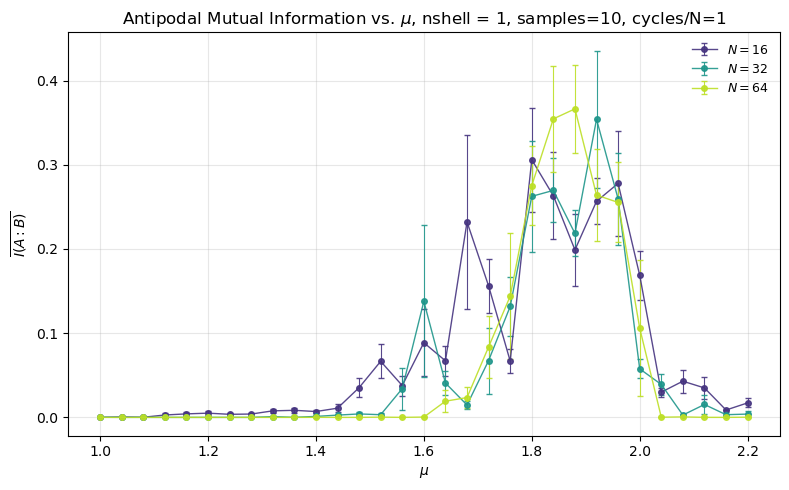

In [6]:

# ---------------- Plot 1: Antipodal MI vs mu ----------------
fig, ax = plt.subplots(figsize=(8, 5))
colors_mi = cm.viridis(np.linspace(0.15, 0.9, len(N_list)))
marker = "o"

for ci, N in enumerate(N_list):
    ax.errorbar(
        mu_axis,
        mi_mean[N],
        yerr=mi_std[N] / np.sqrt(samples),
        marker=marker,
        color=colors_mi[ci],
        label=rf"$N={int(N)}$",
        linewidth=1.0,
        markersize=4,
        elinewidth=0.8,
        capsize=2.5,
        alpha=0.9,
    )

ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\overline{I(A:B)}$")
ax.set_title(rf"Antipodal Mutual Information vs. $\mu$, nshell = 1, samples={samples}, cycles/N={cycles_per_N}")
ax.grid(True, alpha=0.3)
ax.legend(frameon=False, ncol=1, fontsize=9)
fig.tight_layout()
plt.show()


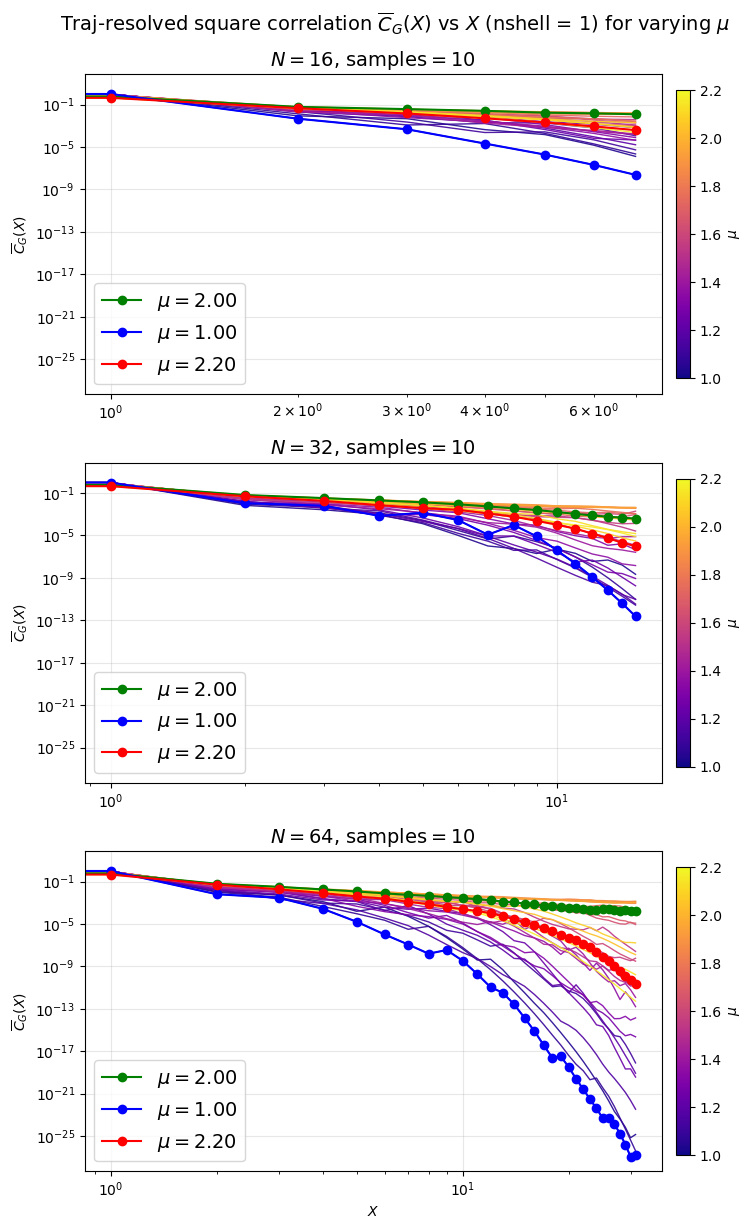

In [8]:

# ---------------- Plot 2: Correlation scaling with colorbar over mu ----------------
cmap = cm.plasma
mu_min, mu_max = min(all_mu), max(all_mu)
norm = colors.Normalize(vmin=mu_min, vmax=mu_max)
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, axes = plt.subplots(len(N_list), 1, figsize=(8, 4 * len(N_list)), sharey=True)
axes = np.atleast_1d(axes)

for ai, N in enumerate(N_list):
    ax = axes[ai]
    for mu_val, C_mean in zip(mu_axis, corr_mean[N]):
        color = scalar_map.to_rgba(mu_val)
        X_vals = np.arange(len(C_mean))
        ax.plot(X_vals, C_mean, color=color, linewidth=1.0, alpha=0.9)
    ax.set_title(rf"$N={N}$, samples$={samples}$", fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$\overline{C}_G(X)$")
    if ai == len(N_list) - 1:
        ax.set_xlabel(r"$X$")
    cbar = fig.colorbar(scalar_map, ax=ax, shrink=0.9, pad=0.02)
    cbar.set_label(r"$\mu$")

# Overlay mu targets
mu_targets = [2.0, mu_min, mu_max]
color_list = ["green", "blue", "red"]
for idx_mu, mu_target in enumerate(mu_targets):
    for ai, N in enumerate(N_list):
        ax = axes[ai]
        mu_vals = mu_axis
        idx = int(np.argmin(np.abs(mu_vals - mu_target)))
        C_mean = corr_mean[N][idx]
        X_vals = np.arange(len(C_mean))
        ax.plot(X_vals, C_mean, "-o", color=color_list[idx_mu], linewidth=1.5, label=rf"$\mu={mu_target:.2f}$")
        ax.legend(frameon=True, fontsize=14, ncol=1, loc="lower left")

plt.tight_layout()
fig.suptitle(r"Traj-resolved square correlation $\overline{C}_G(X)$ vs $X$ (nshell = 1) for varying $\mu$", y=1.02, fontsize=14)
plt.show()


------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGT

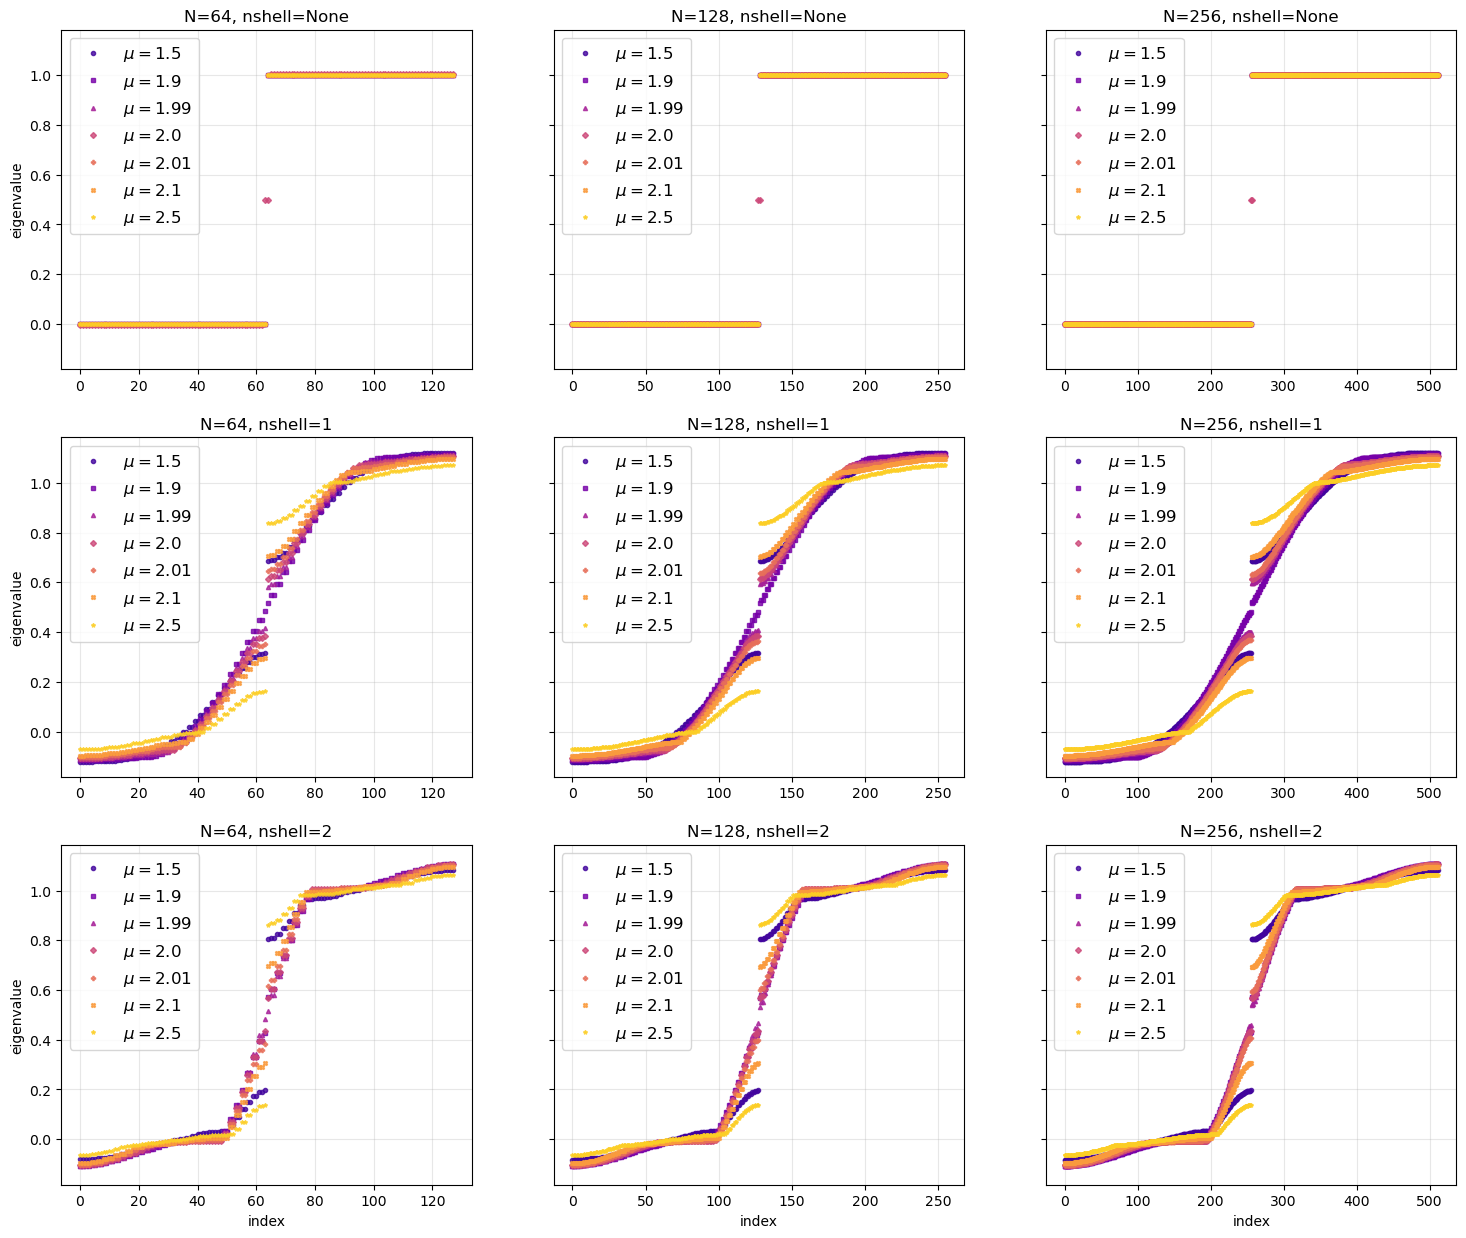

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from classD_1dMFGTN import classD_1d_MFGTN

Ns = [64, 128, 256]                  # columns
nshell_rows = [None, 1, 2]           # rows (adjust if you want nshell=3 instead)
mu_list = [1.5, 1.9, 1.99, 2.0, 2.01, 2.1, 2.5]
t = 1.0

fig, axes = plt.subplots(len(nshell_rows), len(Ns), figsize=(18, 15), sharey=True)
axes = np.atleast_2d(axes)

markers = ["o", "s", "^", "D", "P", "X", "*"]
colors = cm.plasma(np.linspace(0.1, 0.9, len(mu_list)))

for r, nshell in enumerate(nshell_rows):
    for c, N in enumerate(Ns):
        ax = axes[r, c]
        for mu, marker, color in zip(mu_list, markers, colors):
            m = classD_1d_MFGTN(N=N, DW=False, nshell=nshell,
                                mu_1=mu, mu_2=mu, t_1=t, t_2=t)
            m.construct_MW_projectors(nshell=nshell)

            S_X_tot = np.zeros((2 * N, 2 * N), dtype=complex)
            for X in range(N):
                v1 = m.MW1[:, X].astype(np.complex128)
                v2 = m.MW2[:, X].astype(np.complex128)
                v1 /= np.linalg.norm(v1) + 1e-15
                v2 /= np.linalg.norm(v2) + 1e-15
                v1 = v1[:, None]
                v2 = v2[:, None]
                S_X = 1j * (v1 @ v2.T - v2 @ v1.T)
                S_X_tot += S_X

            P = 0.5 * (np.eye(2 * N) + S_X_tot)
            P = 0.5 * (P + P.conj().T)
            eigvals = np.linalg.eigvalsh(P)

            ax.plot(eigvals, marker=marker, linestyle="None", ms=3, alpha=0.8, color=color, label=rf"$\mu={mu}$")

        ax.set_title(f"N={N}, nshell={nshell}")
        ax.grid(True, alpha=0.3)
        if c == 0:
            ax.set_ylabel("eigenvalue")
        if r == len(nshell_rows) - 1:
            ax.set_xlabel('index')
            # put legend in an unused corner of the last subplot of the first row
        ax.legend(frameon=True, fontsize=12, loc="best")

plt.show()


------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGTN Initialized -------------------------
------------------------- classD_1d_MFGT

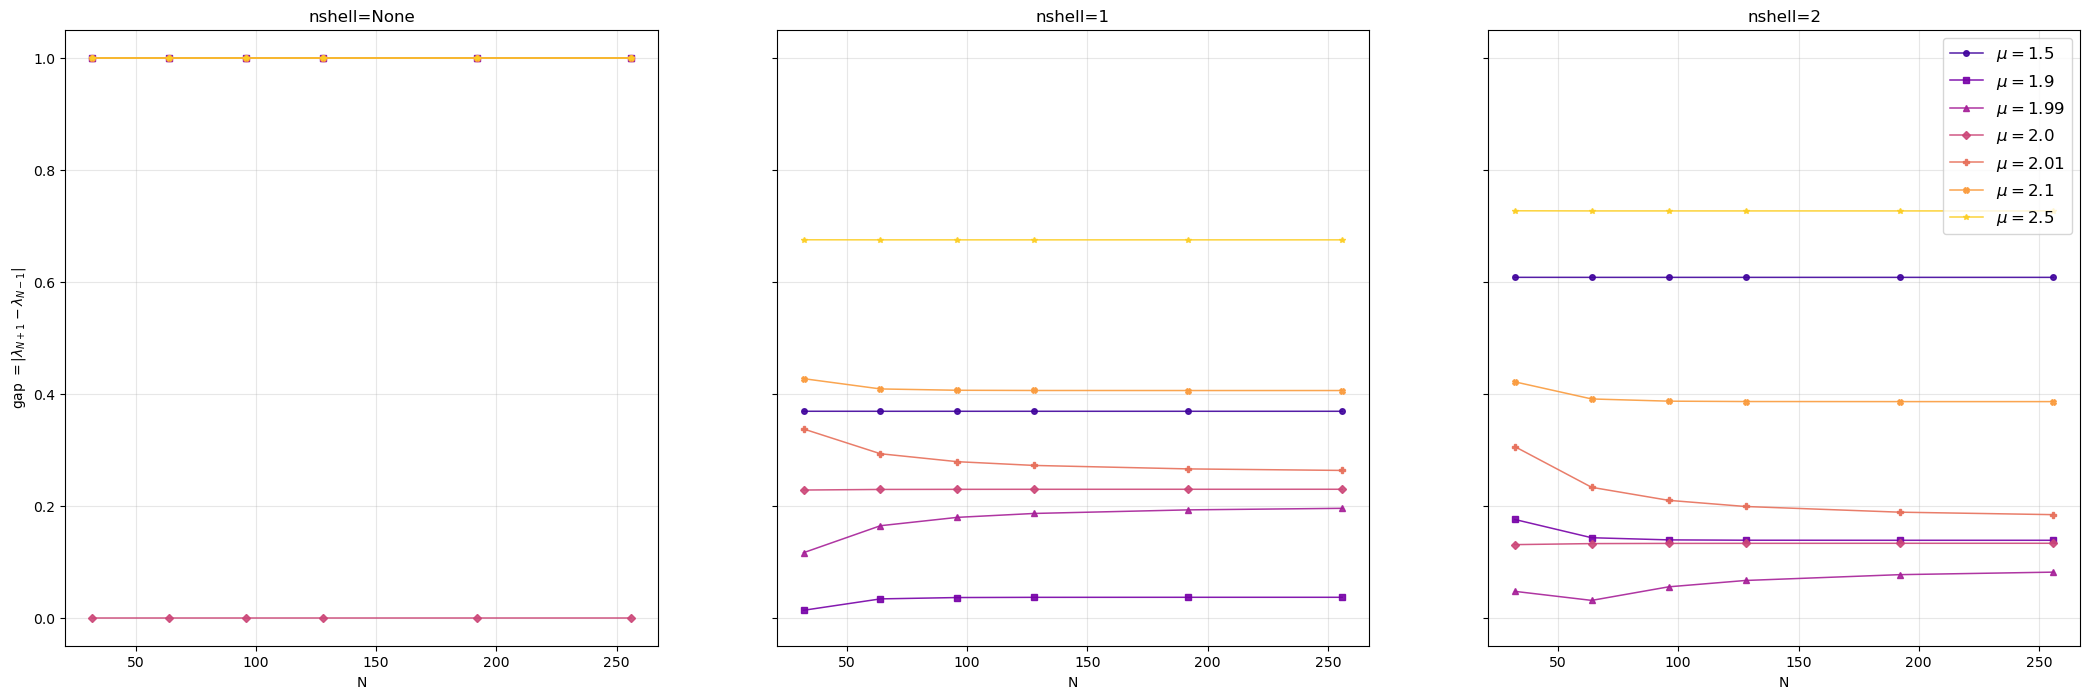

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from classD_1dMFGTN import classD_1d_MFGTN

Ns = [32, 64, 96, 128, 192, 256]
mu_list = [1.5, 1.9, 1.99, 2.0, 2.01, 2.1, 2.5]
nshell_list = [None, 1, 2]
t = 1.0

colors = cm.plasma(np.linspace(0.1, 0.9, len(mu_list)))
markers = ["o", "s", "^", "D", "P", "X", "*"]

fig, axes = plt.subplots(1, len(nshell_list), figsize=(26, 8), sharey=True)
axes = np.atleast_1d(axes)

for ax, nshell in zip(axes, nshell_list):
    for mu, color, marker in zip(mu_list, colors, markers):
        gaps = []
        for N in Ns:
            m = classD_1d_MFGTN(N=N, DW=False, nshell=nshell,
                                mu_1=mu, mu_2=mu, t_1=t, t_2=t)
            m.construct_MW_projectors(nshell=nshell)

            S_X_tot = np.zeros((2 * N, 2 * N), dtype=complex)
            for X in range(N):
                v1 = m.MW1[:, X].astype(np.complex128)
                v2 = m.MW2[:, X].astype(np.complex128)
                v1 /= np.linalg.norm(v1) + 1e-15
                v2 /= np.linalg.norm(v2) + 1e-15
                v1 = v1[:, None]; v2 = v2[:, None]
                S_X = 1j * (v1 @ v2.T - v2 @ v1.T)
                S_X_tot += S_X

            P = 0.5 * (np.eye(2 * N) + S_X_tot)
            P = 0.5 * (P + P.conj().T)
            eigvals = np.linalg.eigvalsh(P)

            # gap = |λ_{N+1} - λ_{N-1}| (0-based indexing)
            if eigvals.size > N + 1:
                gap = abs(eigvals[N] - eigvals[N-1])
            else:
                gap = np.nan
            gaps.append(gap)

        ax.plot(Ns, gaps, marker=marker, color=color, label=rf"$\mu={mu}$",
                linewidth=1.1, markersize=4, alpha=0.9)

    ax.set_title(f"nshell={nshell}")
    ax.set_xlabel("N")
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel(r"gap $=|\lambda_{N+1}-\lambda_{N-1}|$")
axes[-1].legend(frameon=True, fontsize=12, loc="best")
plt.show()
